### Recognizing High-redshift Galaxy Mergers with Convolutional Neural Networks using DeepMerge simulated data with an application on real-world data
# Real data

In [40]:
import os
import numpy as np
import time

from astropy.io import fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm

import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
from sklearn.model_selection import train_test_split
import pandas as pd

*Ema Donev, 2023.*

In this notebook you will find all the information about the real data downloaded from AstroNN how to prepare it for modelling.

## Section 1: Downloading the data

The data is from AstroNN, https://astronn.readthedocs.io/en/latest/galaxy10.html. I am downloading the Galaxy10 DECals dataset, which includes 17736 images of different galaxy types. These images were obtained from the SDSS images from the Galaxy Zoo Data release 2. The images were processed and published so that the general public can classify the galaxy images, since there are so many. After many classified images, it was determined that ~38 classifications were made per image and that the labels are just as trustworthy as if professional scientists classified galaxies. 

The data is a `H5` file, or a `Hierarchical Data Format`. These are used to store massive amounts of data as multidimensional arrays, of which images are an example. Scientific data is typicaly stored in this format, and originally it was selected by NASA as a standard data format in science. 

In [41]:
filename = '../input/Galaxy10_DECals.h5'

In [42]:
hf = h5py.File(filename, 'r')
hf.keys()

<KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>

After accesing the columns available in the dataset, I extract the iamges, column `images`, and the labels, the column `ans`. 

In [60]:
images_r = hf.get('images')
print(images_r.shape)
labels_r = hf.get('ans')
print(labels_r.shape)

(17736, 256, 256, 3)
(17736,)


In [71]:
images_r = hf['images']

ValueError: Invalid location identifier (invalid location identifier)

## Section 2: viewing the data

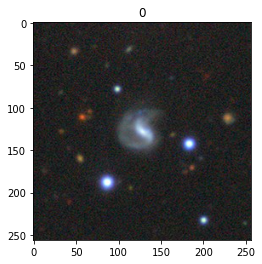

In [44]:
image = images_r[3]
norm = simple_norm(image, 'log', max_percent=99.75)
plt.imshow(image, aspect='equal', norm=norm)
plt.title(labels_r[3])
plt.show()

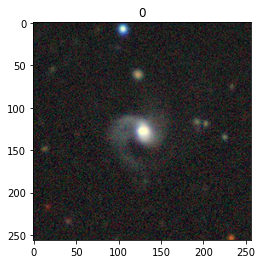

In [49]:
image = images_r[108]
norm = simple_norm(image, 'log', max_percent=99.75)
plt.imshow(image, aspect='equal', norm=norm)
plt.title(labels_r[108])
plt.show()

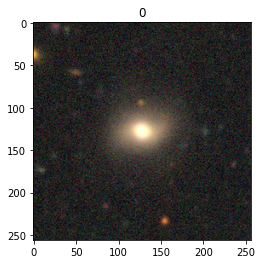

In [50]:
image = images_r[555]
norm = simple_norm(image, 'log', max_percent=99.75)
plt.imshow(image, aspect='equal', norm=norm)
plt.title(labels_r[555])
plt.show()

## Section 3: adapting the labels

The labels are designed as such: 
-  Class 0 (1081 images): Disturbed Galaxies
- Class 1 (1853 images): Merging Galaxies
-  Class 2 (2645 images): Round Smooth Galaxies
- Class 3 (2027 images): In-between Round Smooth Galaxies
- Class 4 ( 334 images): Cigar Shaped Smooth Galaxies
- Class 5 (2043 images): Barred Spiral Galaxies
- Class 6 (1829 images): Unbarred Tight Spiral Galaxies
- Class 7 (2628 images): Unbarred Loose Spiral Galaxies
- Class 8 (1423 images): Edge-on Galaxies without Bulge
-  Class 9 (1873 images): Edge-on Galaxies with Bulge

Since the problem is a binary classification, it requires 2 labels, not 10. So, I am going to leave class 1(label 1) as the merger class, and group all the other classes into class 0 (label 0) as the non-merging class.

In [62]:
for i, element in enumerate(labels_r):
    if element != 1:
        labels_r[i] = 0
        print(labels_r[i])

OSError: Can't write data (no write intent on file)

<HDF5 dataset "ans": shape (17736,), type "|u1">


In [ ]:
images_r = images_r.astype(np.float32)
labels_r = labels_r.astype(np.float32)